In [1]:
import json

In [11]:
with open('../models/model_testing_avg_results.json') as f:
    avg_results = json.load(f)
    
with open('../models/model_training_final_best_params.json') as f:
    final_results = json.load(f)

In [12]:
avg_results = {model: scores['r2'] for model, scores in avg_results.items()}
del avg_results['SVR']
avg_results

{'Linear': 0.4486540287383025,
 'Ridge': 0.4488273999025907,
 'Lasso': 0.4487294741952258,
 'KNN': 0.4762073305570884,
 'SGD': 0.40722917813853055,
 'RF': 0.4906446477714492,
 'AB': 0.4638562108209229,
 'GB': 0.44270544005043533}

In [13]:
final_results = {model: scores['best_score'] for model, scores in final_results.items()}
del final_results['HGB']
final_results

{'Linear': 0.605701854118416,
 'Ridge': 0.6031525375464939,
 'Lasso': 0.6034069700325795,
 'KNN': 0.6363059078726541,
 'SGD': 0.6057729305869595,
 'RF': 0.6627302562651282,
 'AB': 0.6644693078125189,
 'GB': 0.6336380803675312}

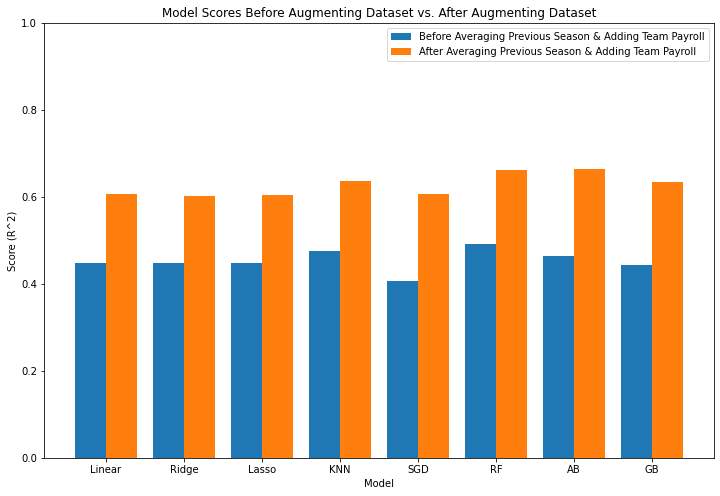

In [20]:
import numpy as np
import matplotlib.pyplot as plt

x_labels = list(avg_results.keys())
avg_result_list = list(avg_results.values())
final_result_list = list(final_results.values())

X_axis = np.arange(len(x_labels))
plt.figure(figsize=(12, 8))

plt.bar(X_axis - 0.2, avg_result_list, 0.4, label = 'Before Averaging Previous Season & Adding Team Payroll')
plt.bar(X_axis + 0.2, final_result_list, 0.4, label = 'After Averaging Previous Season & Adding Team Payroll')

plt.ylim((0,1))
plt.xticks(X_axis, x_labels)
plt.xlabel("Model")
plt.ylabel("Score (R^2)")
plt.title("Model Scores Before Augmenting Dataset vs. After Augmenting Dataset")
plt.legend()
plt.savefig('../figures/model_results_comparison.png', bbox_inches='tight')
plt.show()